In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from math import log, sqrt, pi, exp
from scipy.stats import norm
from datetime import datetime, date

In [2]:
# s-present stock or asset price
# x-exercise price
# r-risk free rate(continuously compounded)
# sigma-volatility
# t-time to expiration
def d1(s,x,r,sigma,t):
    return (log(s/x)+(r+0.5*sigma**2)*t)/(sigma*sqrt(t))
def d2(s,x,r,sigma,t):
    return d1(s,x,r,sigma,t)-sigma*sqrt(t)


d1 is the delta of a call option
Also norm.cdf of d2 is the probability stock price at expiry will exceed x.

In [3]:
# prices by bsm model
def call_price(s,x,r,sigma,t):
    return s*norm.cdf(d1(s,x,r,sigma,t))-x*exp(-r*t)*norm.cdf(d2(s,x,r,sigma,t))
def put_price(s,x,r,sigma,t):
    return s*(norm.cdf(d1(s,x,r,sigma,t))-1)-x*exp(-r*t)*(norm.cdf(d2(s,x,r,sigma,t))-1)
        

In [4]:
# calculation of greeks
# delta- sensitivity of an option to a change in stock price 
def delta_call(s,x,r,sigma,t):
    return norm.cdf(d1(s,x,r,sigma,t))
def delta_put(s,x,r,sigma,t):
    return norm.cdf(d1(s,x,r,sigma,t))-1

# theta-sensitivity of an option to a change in time to maturity
def call_theta(s,x,r,sigma,t):
    return ((-s*norm.pdf(d1(s,x,r,sigma,t))*sigma)/(2*sqrt(t))-r*x*exp(-r*t)*(norm.cdf(d2(s,x,r,sigma,t))))/252
def put_theta(s,x,r,sigma,t):
    return ((-s*norm.pdf(d1(s,x,r,sigma,t))*sigma)/(2*sqrt(t))+r*x*exp(-r*t)*(norm.cdf(-d2(s,x,r,sigma,t))))/252

# gamma-theta-sensitivity of an option to a change in delta or double derivative with respect to time
def gamma(s,x,r,sigma,t):
    return norm.pdf(d1(s,x,r,sigma,t))/(s*sigma*sqrt(t))

# vega-sensitivity of an option to a change in volatility 
def vega(s,x,r,sigma,t):
    return 0.01*s*norm.pdf(d1(s,x,r,sigma,t))*sqrt(t) #volatility change in percent

# rho-sensitivity of an option to a change in risk free rate
def rho_call(s,x,r,sigma,t):
    return 0.01*x*norm.cdf(d2(s,x,r,sigma,t))*t*exp(-r*t) #risk free rate change in percent
def rho_put(s,x,r,sigma,t):
    return -0.01*x*norm.cdf(-d2(s,x,r,sigma,t))*t*exp(-r*t)



In [5]:
put_price(50,45,0.05,0.12,0.25)

0.026398931138965187

In [6]:
norm.ppf(0.5)

0.0

In [7]:
norm.cdf(-1.99)+norm.cdf(1.99) # ppf and cdf are inverse

1.0

In [8]:
stock_price = np.linspace(100, 600, 1001)
vol = np.linspace(0.05, 0.60, 801)
df = pd.DataFrame(columns = ['close'])
df['close'] = stock_price
df['lcp'] = df['close'].shift(1)
df['returns'] = (df['close'] - df['lcp'])/df['lcp']
df['volatility'] = df['returns'].rolling(20).std()*sqrt(252)
risk_free_rate = 0.04

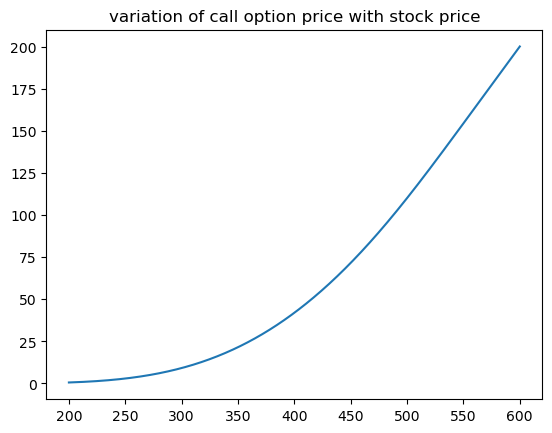

In [9]:
strike_price = 400
option_prices = []

for i in range(200, 1001):
  time = (1001 - i)/365
  option_prices.append(call_price(df['close'][i], strike_price, risk_free_rate, 0.2,time))

plt.plot(df['close'][200:], option_prices)
plt.title("variation of call option price with stock price");

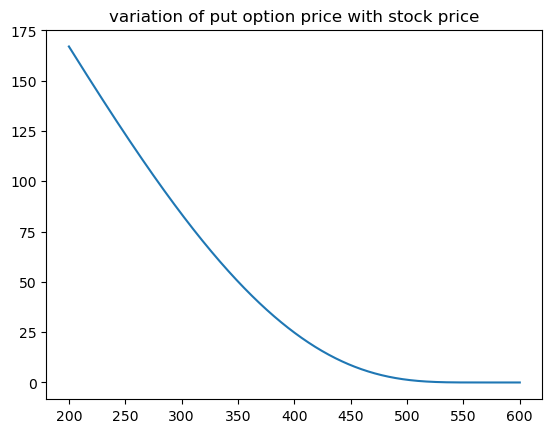

In [10]:
option_prices = []

for i in range(200, 1001):
  time = (1001 - i)/365
  option_prices.append(put_price(df['close'][i], strike_price, risk_free_rate, 0.2,time))
plt.plot(df['close'][200:], option_prices)
plt.title("variation of put option price with stock price");


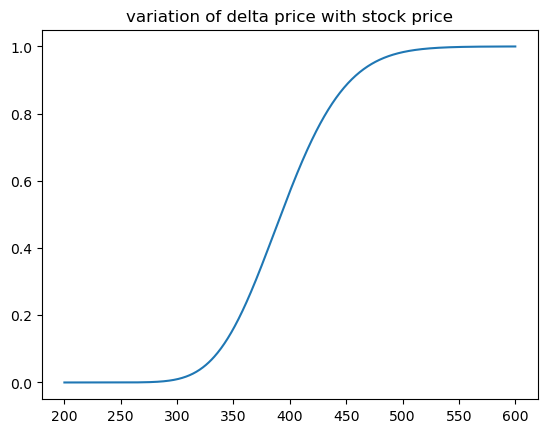

In [11]:
delta = []
for i in range(200, 1001):
  delta.append(delta_call(df['close'][i], strike_price, risk_free_rate, 0.2, 120/365))

plt.plot(df['close'][200:], delta)
plt.title("variation of delta price with stock price");

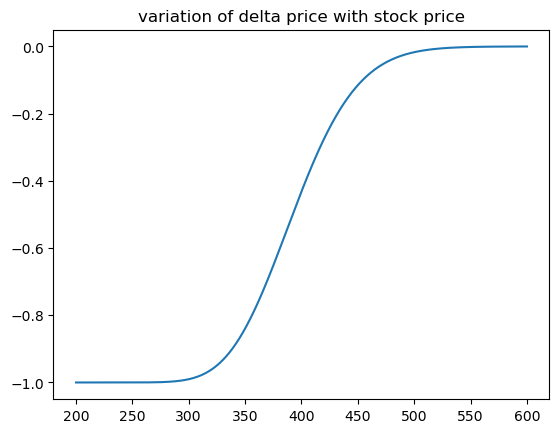

In [12]:
delta = []
for i in range(200, 1001):
  delta.append(delta_put(df['close'][i], strike_price, risk_free_rate, 0.2, 120/365))

plt.plot(df['close'][200:], delta)
plt.title("variation of delta price with stock price");

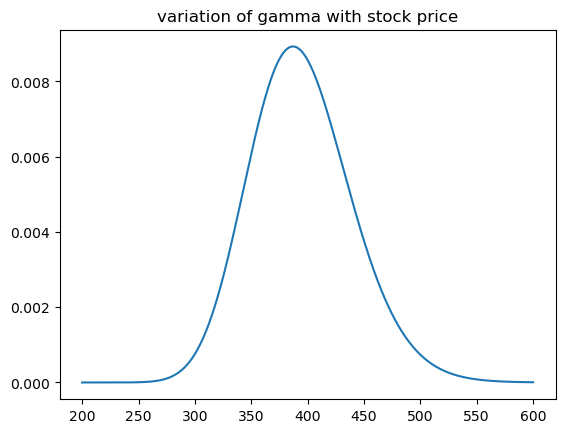

In [13]:
Gamma = []

for i in range(200, 1001):
  Gamma.append(gamma(df['close'][i], strike_price, risk_free_rate, 0.2, 120/365))
plt.plot(df['close'][200:], Gamma)
plt.title("variation of gamma with stock price");

This demonstrates that gamma is maximum for at-the-money options


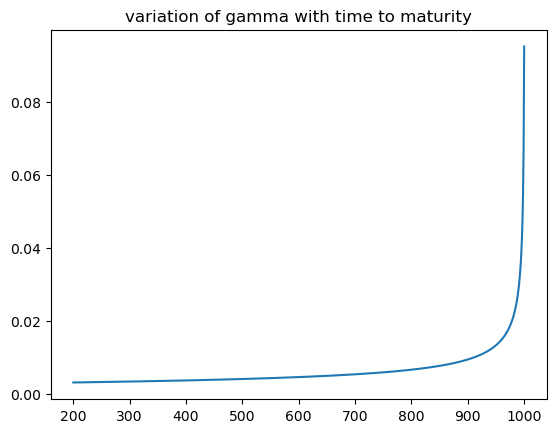

In [14]:
Gamma = []

for i in range(200, 1001):
  time = (1001 - i)/365
  Gamma.append(gamma(400, strike_price, risk_free_rate, 0.2, time))

plt.plot(range(200, 1001), Gamma)
plt.title("variation of gamma with time to maturity");

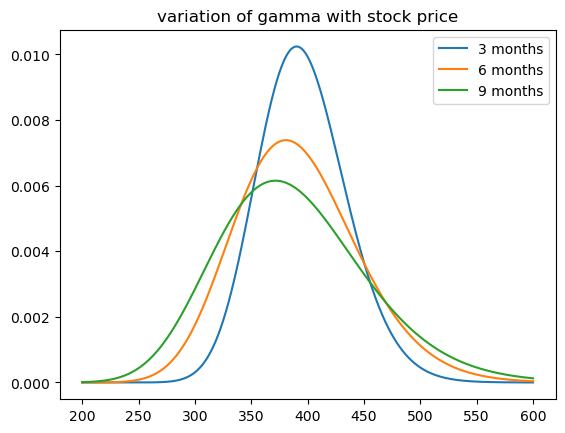

In [25]:
Gamma3 = []
Gamma6 = []
Gamma9 = []


for i in range(200, 1001):
    Gamma3.append(gamma(df['close'][i], strike_price, risk_free_rate, 0.2, 90/365))
    Gamma6.append(gamma(df['close'][i], strike_price, risk_free_rate, 0.2, 180/365))
    Gamma9.append(gamma(df['close'][i], strike_price, risk_free_rate, 0.2, 270/365))
        
plt.plot(df['close'][200:], Gamma3,label="3 months")
plt.plot(df['close'][200:], Gamma6,label="6 months")
plt.plot(df['close'][200:], Gamma9,label="9 months")
plt.legend()

plt.title("variation of gamma with stock price");

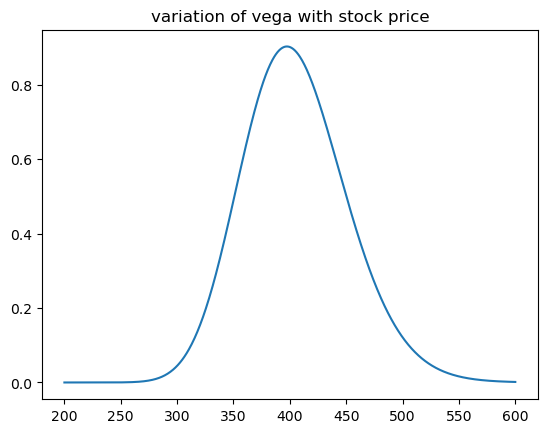

In [15]:
Vega = []

for i in range(200, 1001):
  Vega.append(vega(df['close'][i], strike_price, risk_free_rate, 0.2, 120/365))

plt.plot(df['close'][200:], Vega)
plt.title("variation of vega with stock price");

Again maximum for ATM options.

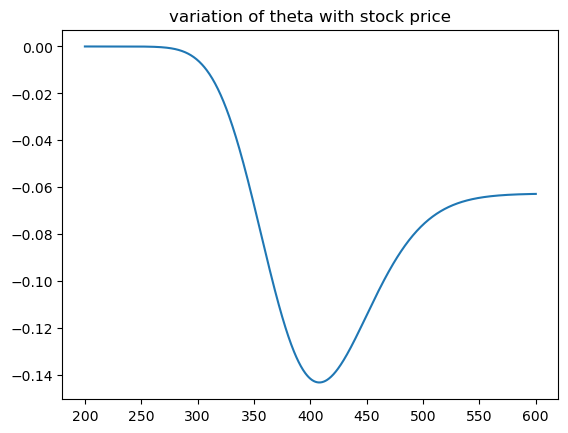

In [16]:
Theta = []

for i in range(200, 1001):
  Theta.append(call_theta(df['close'][i], strike_price, risk_free_rate, 0.2, 120/365))

plt.plot(df['close'][200:], Theta)
plt.title("variation of theta with stock price");

Minimum for ATM options.